Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "Nicolette Auld-Griffith"

---

In [23]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import time

# HW 7:  Intro to Linear Algebra



# Linear Algebra: Part 1

## Question 1: Matrix Norms and Condition Numbers

Consider the Matrices

$$
    A = \begin{bmatrix} 1 & 1 \\
                        1 & a \\
         \end{bmatrix} \quad\quad
     A^{-1} = \frac{1}{a-1}\begin{bmatrix} a & -1 \\
                        -1 & 1 \\
         \end{bmatrix} 
$$
where $a\in\mathbb{R}$

**(a)** [6] Analytically calculate, as a function of $a$

* the induced $p$-norm $||A||_p$ 
* the $p$ condition number $\kappa_p(A) =||A||_p||A^{-1}||_p$ 

consider  $p=1,2,\infty$

(hint: for a symmetric matrix, the singular values are equal to the absolute value of the eigenvalues of $A$ (sorted from largest to smallest))

The induced $1$-norm $||A||_1$ and $\infty$-norm $||A||_\infty$ is the max of $2$ and $1 + |a|$

The induced $2$-norm $||A||_2$ is the max of $|\lambda_1| and |\lambda_2|$ where $$\lambda_1 = \frac{-\sqrt{a^2-2a+5}+a+1}{2}$$ and $$\lambda_2 = \frac{\sqrt{a^2-2a+5}+a+1}{2}$$

$\kappa_1 (A)$ and $\kappa_\infty (A)$ is the max of $2$ and $1 + |a|$ multiplied by the max of $|\frac{a+1}{a-1}|$ and $|\frac{2}{a-1}|$.  

$\kappa_2 (A) =$ the max of $|\lambda_1| and |\lambda_2|$ multiplied by the max of $|\lambda_3|$ and $|\lambda_4|$ where $$\lambda_3 = \frac{-\sqrt{a^2-2a+5}+a+1}{2(a-1)}$$ and $$\lambda_4 = \frac{\sqrt{a^2-2a+5}+a+1}{2(a-1)}$$

**(b)** [6] write two short python routine that returns $||A||_p$, and $\kappa_p(A)$ for the matrices in part (a). Again, just consider $p=1,2,\infty$) and raise a ValueError if $p$ is any other value.

In [68]:
def mypnorm(a, p ):
    """
    return ||A||_p for A = [[ 1, 1],
                            [ 1, a]]
                            
    for p=1, 2, or numpy.infty
    
    parameters:
    -----------
    
    a: scalar 
        value of a
    p: scalar
        1, 2 or np.infty
    returns:
    --------
    pnorm(a)
    
    raises:
    --------
    ValueError:  if p is not in [ 1, 2, numpy.infty]
    """
    e1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    e2= numpy.abs(0.5 *(-numpy.sqrt(a**2-2*a+5)+a+1))
    
    if p not in [1,2,numpy.infty]:
        raise ValueError()
    elif p==1 or p==numpy.infty:
        return numpy.max([2, 1+abs(a)])
    elif p==2: 
        return numpy.max([e1,e2])
    
    
    
        

def mycond(a, p):
    """
    write your own docstring to return the condition number
    """
    e1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    e2 = numpy.abs(0.5* (-numpy.sqrt(a**2-2*a+5)+a+1))
    e3 = numpy.abs((-numpy.sqrt(a**2-2*a+5)+a+1) / (2*(a-1)))
    e4 = numpy.abs((numpy.sqrt(a**2-2*a+5)+a+1)/ (2*(a-1)))

    if p not in [1, 2, numpy.infty]:
        raise ValueError()
    elif p==1 or p==numpy.infty:
        return numpy.max([2, 1 + abs(a)]) * numpy.max([abs(a/(a-1)) + 1/abs(a-1), abs(1/(a-1)) + 1/abs(a-1)])
    elif p==2: 
        return (max(e1, e2)*max(e3, e4))
          

In [69]:
A = lambda a: numpy.array([ [ 1, 1], [1, a]])
aa = numpy.array([ -2, 0, 1.0001, 2])


for p in [ 1, 2, numpy.infty]:
    normp = [ mypnorm(a, p) for a in aa]
    test = [ numpy.linalg.norm(A(a), ord=p) for a in aa]    
    print('||A||_{} = {}'.format(p, normp))
    numpy.testing.assert_allclose(normp,test)
print('Successful Norm test')

for p in [ 1, 2, numpy.infty]:
    condp = [ mycond(a, p) for a in aa]
    test = [ numpy.linalg.cond(A(a), p) for a in aa]    
    print('k(A)_{} = {}'.format(p, condp))
    numpy.testing.assert_allclose(condp,test)
print('Successful condition number test')

# test the exception
try:
    mypnorm(0.,4)
except ValueError as err:
    print('Success: you caught the ValueError')
else:
    assert False, 'whoops, missed the exception'


||A||_1 = [3.0, 2.0, 2.0000999999999998, 3.0]
||A||_2 = [2.302775637731995, 1.618033988749895, 2.00005000125, 2.618033988749895]
||A||_inf = [3.0, 2.0, 2.0000999999999998, 3.0]
Successful Norm test
k(A)_1 = [3.0, 4.0, 40004.0001000044, 9.0]
k(A)_2 = [1.7675918792439984, 2.618033988749895, 40002.00007500565, 6.854101966249685]
k(A)_inf = [3.0, 4.0, 40004.0001000044, 9.0]
Successful condition number test
Success: you caught the ValueError


 **(c)** [4] Make a plot comparing $\log(\kappa(A))$ vs $a$ for the different matrix norms over the range $a\in[-15,15]$. (you can check it by plotting `numpy.linalg.cond(A, ord)` as well. As always, make it pretty.

<ipython-input-73-363ff785905a>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = fig.add_subplot(1, 3, 2)


Text(0, 0.5, '$log(\\kappa(A))$')

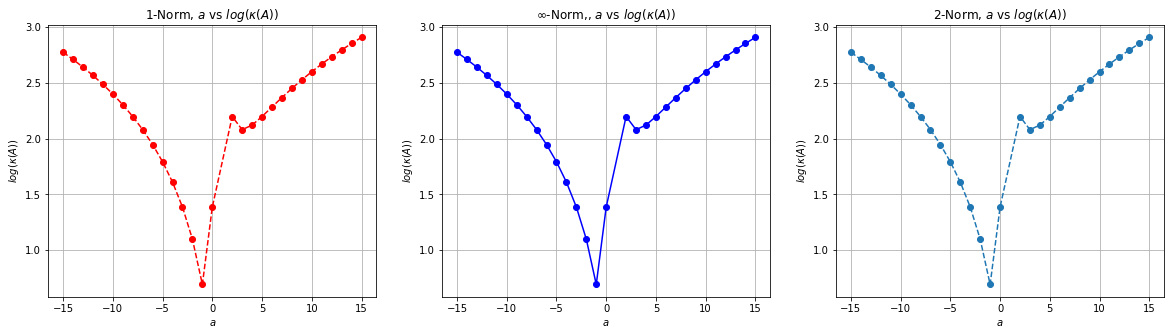

In [73]:
a = [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
x = []
y = [] 
z = [] 

fig = plt.figure(figsize =(20, 5))

##1 Norm

for i in a: 
    x.append(numpy.log(mycond(i, 1)))

axes = fig.add_subplot(1, 3, 1)
axes.plot(a, x, 'ro--')
axes.grid()
axes.set_title("1-Norm, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')

#Inf-Norm

for i in a: 
    y.append(numpy.log(mycond(i, numpy.infty)))

    axes = fig.add_subplot(1, 3, 2)
axes.plot(a, x, 'bo-')
axes.grid()
axes.set_title("$\infty$-Norm,, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')

#2-norm

for i in a: 
    z.append(numpy.log(mycond(i,2)))

axes = fig.add_subplot(1, 3, 3)
axes.plot(a, x, 'o--')
axes.grid()
axes.set_title("2-Norm, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')



**(d)** [8] Given your plot comment on the following:
* What value of $a$ gives the best conditioned matrix.  Why?
* What value of $a$ gives the least well-condition matrix.  Why?
* Does it matter which norm we measure the condition number in?
* What value of $a$ gives the best conditioned matrix for $a>1$
 

$a = -1$ gives the best conditioned matrix because it results in the lowest value for $log(\kappa(A))$.

$a = 15$ gives the least well-conditioned matrix because it results in the greatest value for $log(\kappa(A))$.

Yes the norm matters when measuring the condition number since we get different values for $log(\kappa(A))$ for different norms when $a$ is constant. 

$a = 3$ gives the best conditioned matrix for $a > 1$ because it results in the lowest value for $log(\kappa(A))$ when $a > 1$.

## Question 2: Conditioning and LU factorization

Consider the two identical linear problems $A\mathbf{x}=\bf{b}$

$$
    \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 1\\ 2\end{bmatrix} \quad\quad
     \begin{bmatrix} 1 & 1 \\\epsilon & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 2\\ 1\end{bmatrix} 
$$
where $\epsilon \ll \epsilon_{mach}$

**(a)**  [6 pts] Find the 1 condition number of both matrices. Are they the same?  Are these matrices well conditioned? Check your answer using numpy with $\epsilon = 0.1\epsilon_{mach}$

Let $\begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix} = A_1$ and $\begin{bmatrix} 1 & 1 \\ \epsilon & 1 \\ \end{bmatrix} = A_2$.

Then $A_{1}^{-1} = \begin{bmatrix} \frac{1}{\epsilon - 1} & \frac{-1}{\epsilon - 1} \\ \frac{-1}{\epsilon - 1} & \frac{\epsilon}{\epsilon - 1} \\ \end{bmatrix}$ and $A_{2}^{-1} = \begin{bmatrix} \frac{1}{1 - \epsilon} & \frac{-1}{1 - \epsilon} \\ \frac{-\epsilon}{1 - \epsilon} & \frac{1}{1 - \epsilon} \\ \end{bmatrix}$.

The 1-norm of $A_1$ and $A_2$ is either $\epsilon + 1$ or $1 + 1 = 2$ and since $2$ is our max, our 1-norm for both matrices is $2$. 

The 1-norm of $A_{1}^{-1}$ is either $|\frac{1}{\epsilon - 1}| + |-\frac{1}{\epsilon - 1}| = |\frac{2}{\epsilon - 1}|$ or $|-\frac{1}{\epsilon - 1}| + |\frac{\epsilon}{\epsilon - 1}| = |\frac{1 + \epsilon}{\epsilon - 1}|$. Since $|\frac{2}{\epsilon - 1}|$ is greater, this is our 1-norm. 

The 1-norm of $A_{2}^{-1}$ is either $|\frac{1}{1 - \epsilon}| + |-\frac{1}{1 - \epsilon}| = |\frac{2}{1 - \epsilon}|$ or $|-\frac{\epsilon}{1 - \epsilon}| + |\frac{1}{1 - \epsilon}| = |\frac{1 + \epsilon}{1 - \epsilon}|$. Since $|\frac{2}{1 - \epsilon}|$ is greater, this is our 1-norm. 

To get our condition number we solve $||A|| \cdot ||A^{-1}||$ so for $A_1$ we get, $$ 2 \cdot |\frac{2}{\epsilon - 1}| = \frac{4}{|\epsilon - 1|} \approx 4$$ and for $A_2$ we get $$ 2 \cdot |\frac{2}{1 - \epsilon}| = \frac{4}{|1 -\epsilon|} \approx 4$$

These are the same and since they are small numbers, the matrices are well conditioned.

In [65]:
e_var = 0.1 * numpy.finfo(float).eps

A1 = numpy.array([[e_var, 1.], [1., 1.]])
A2 = numpy.array([[1., 1.], [e_var, 1.]])
A3= numpy.linalg.inv(A1)
A4 = numpy.linalg.inv(A2)

norm_A1 = numpy.linalg.norm(A1, ord = 1)
norm_A2 = numpy.linalg.norm(A2, ord = 1) 
norm_A3 = numpy.linalg.norm(A3, ord = 1)
norm_A4 = numpy.linalg.norm(A4, ord = 1)

CondA1 = norm_A1*norm_A3

CondA2 = norm_A2*norm_A4

if CondA2 == CondA1:
    print("success, both are equal")



    


success, both are equal


**(b)**  [4 pts] Find the analytic solution to both problems in infinite precision.  Are they the same?

$x = A^{-1} b$

$$x = \frac{1}{\epsilon - 1} \begin{bmatrix} 1 & -1 \\ -1 & \epsilon \\ \end{bmatrix}\begin{bmatrix} 1 \\ 2 \\ \end{bmatrix} = \frac{1}{\epsilon - 1}\begin{bmatrix} -1 \\ 2\epsilon - 1 \\ \end{bmatrix} = \begin{bmatrix} \frac{-1}{\epsilon - 1} \\ \frac{2\epsilon - 1}{\epsilon - 1}\\ \end{bmatrix} = \begin{bmatrix} \frac{1}{1 - \epsilon} \\ \frac{2\epsilon - 1}{\epsilon - 1} \\ \end{bmatrix}$$

$$x = \frac{1}{1 - \epsilon} \begin{bmatrix} 1 & -1 \\ -\epsilon & 1 \\ \end{bmatrix} \begin{bmatrix} 2 \\ 1 \\ \end{bmatrix} = \frac{1}{1 - \epsilon} \begin{bmatrix} 1 \\ 1 - 2\epsilon \\ \end{bmatrix} = \begin{bmatrix} \frac{1}{1 - \epsilon} \\ \frac{1 - 2\epsilon}{1 - \epsilon}\\ \end{bmatrix} = \begin{bmatrix} \frac{1}{1 - \epsilon} \\ \frac{2\epsilon - 1}{\epsilon - 1} \\ \end{bmatrix}$$

These are the same.

**(c)**  [4 pts] Now solve both problems analytically using the $LU$ decomposition *without pivoting* but applying the rules of floating point math.  Do you get the same answer?  

the $LU$ decomposition of  
$$ A_1 =  \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}$$
is

$$ A_1 =  \begin{bmatrix} 1 & 0 \\ \frac{1}{\epsilon} & 1 \\ \end{bmatrix}
          \begin{bmatrix} \epsilon & 1 \\ 0  & 1 - \frac{1}{\epsilon} \\ \end{bmatrix}
$$

and for 
$$ A_2 =  \begin{bmatrix}  1 & 1 \\ \epsilon & 1 \\ \end{bmatrix}$$
with $LU$ factorization

$$ A_2 =  \begin{bmatrix} 1 & 0 \\ \epsilon & 1 \\ \end{bmatrix}
          \begin{bmatrix} 1 & 1 \\ 0  & 1 - \epsilon \\ \end{bmatrix}
$$

Solving $L\mathbf{c} = \mathbf{b}$ then $U\mathbf{x}=\mathbf{c}$ 

for the first problem:

$$
    L_1\mathbf{c_1} = \begin{bmatrix} 1\\2\\\end{bmatrix}
$$

or 
$$
\mathbf{c_1} = \begin{bmatrix} 1. \\ 2 - 1./\epsilon \\ \end{bmatrix} \approx \begin{bmatrix} 1. \\  -1./\epsilon \\ \end{bmatrix}
$$
in finite precision...Likewise $U_1$ in finite precisions solve
$$
    \begin{bmatrix} \epsilon & 1 \\ 0  & - \frac{1}{\epsilon} \\ \end{bmatrix}\mathbf{x_1} = \begin{bmatrix} 1. \\  -\frac{1}{\epsilon} \\ \end{bmatrix}
$$ 
gives
$$
    \mathbf{x_1} = \begin{bmatrix} 0.\\ 1 \\ \end{bmatrix} 
$$

The other problem gives 

$$\mathbf{c_2} = \begin{bmatrix} 2 \\ 1 -2\epsilon \\ \end{bmatrix}\approx\begin{bmatrix} 2 \\ 1 \\ \end{bmatrix}
$$

and

$$\mathbf{x_2} = \begin{bmatrix} 1 \\ 1\\ \end{bmatrix}
$$
which is different

**(d)**  [6 pts] Check your solutions using numpy.  

For each problem 
* Calculate the solution using $L\mathbf{c}=\mathbf{b}$, $U\mathbf{x}=\mathbf{c}$ for each pair of $L,U$ derived above (you can use numpy here with $\epsilon=0.1\epsilon_{mach}$)
* Calculate the 1-condition number for each $L$ and $U$ 

Briefly explain these results


In [66]:
e_var = 0.1 * numpy.finfo(float).eps

b1 = numpy.array([[1], [2]])
b2 = numpy.array([[2.], [1.]])

L1 = numpy.array([[1, 0], [1/(e_var), 1]])
U1 = numpy.array([[e_var, 1], [0, 1 - (1/e_var)]])


L2 = numpy.array([[1, 0], [e_var, 1]])
U2 = numpy.array([[1, 1], [0., 1 - e_var]])

L1_inv = numpy.linalg.inv(L1)
L2_inv = numpy.linalg.inv(L2)

U1_inv = numpy.linalg.inv(U1)
U2_inv = numpy.linalg.inv(U2)

c1 = L1_inv @b1
x1 = U1_inv@c1

c2 = L1_inv @b2
x2 = U2_inv @ b2


print(c1)
print(x1)
print(c2)
print(x2)
L1_norm = numpy.linalg.norm(L1, ord = 1)
U1_norm = numpy.linalg.norm(U1, ord = 1)
L2_norm = numpy.linalg.norm(L2, ord = 1)
U2_norm = numpy.linalg.norm(U2, ord = 1)
L1inv_norm = numpy.linalg.norm(L1_inv, ord = 1)
U1inv_norm = numpy.linalg.norm(U1_inv, ord = 1)
L2inv_norm = numpy.linalg.norm(L2_inv, ord = 1)
U2inv_norm = numpy.linalg.norm(U2_inv, ord = 1)

L1_cond = L1_norm * L1inv_norm
U1_cond = U1_norm * U1inv_norm
L2_cond = L2_norm * L2inv_norm
U2_cond = U2_norm * U2inv_norm

print(L1_cond)
print(U1_cond)
print(L2_cond)
print(U2_cond)


[[ 1.000000000000000e+00]
 [-4.503599627370496e+16]]
[[0.]
 [1.]]
[[ 2.000000000000000e+00]
 [-9.007199254740992e+16]]
[[1.]
 [1.]]
2.028240960365167e+33
2.028240960365167e+33
1.0
4.0


The calculation using numpy matches the analytical solution that I got above. The condition number for L i